## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./QueryResults.csv", names=['data', 'tag', 'posts'], header=None)
df.head()

,data,tag,posts
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv("./QueryResults.csv", names=['data', 'tag', 'posts'], header=None)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [3]:
df.head()

,data,tag,posts
0,m,TagName,NaN
1,2008-07-01 00:00:00,c#,3.0
2,2008-08-01 00:00:00,assembly,8.0
3,2008-08-01 00:00:00,javascript,162.0
4,2008-08-01 00:00:00,c,85.0


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [4]:
df.shape

(1992, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [5]:
df.groupby('tag').sum()

,data,posts
tag,,
TagName,m,0.0
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,34852.0
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,336042.0
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1423530.0
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,684210.0
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,46212.0
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,47499.0
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1696403.0
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2056510.0


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [9]:
df = df.iloc[1:]
df.head()
df['data'] = pd.to_datetime(df['data'])

In [10]:
df.head()

,data,tag,posts
3,2008-08-01,javascript,162.0
4,2008-08-01,c,85.0
5,2008-08-01,python,124.0
6,2008-08-01,perl,28.0
7,2008-08-01,c#,511.0


## Data Manipulation



In [18]:
pivoted_df = df.pivot(index='data', columns='tag', values='posts')
pivoted_df.fillna(0, inplace=True)
pivoted_df.head()


tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
data,,,,,,,,,,,,,,
2008-08-01,0.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
2008-12-01,18.0,186.0,1597.0,633.0,134.0,0.0,832.0,627.0,134.0,481.0,441.0,1.0,161.0,0.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [19]:
pivoted_df.shape

(144, 14)

In [20]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='tag')

In [21]:
pivoted_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
data,,,,,,,,,,,,,,
2008-08-01,0.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0
2008-12-01,18.0,186.0,1597.0,633.0,134.0,0.0,832.0,627.0,134.0,481.0,441.0,1.0,161.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [22]:
pivoted_df.count()

tag
assembly      144
c             144
c#            144
c++           144
delphi        144
go            144
java          144
javascript    144
perl          144
php           144
python        144
r             144
ruby          144
swift         144
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

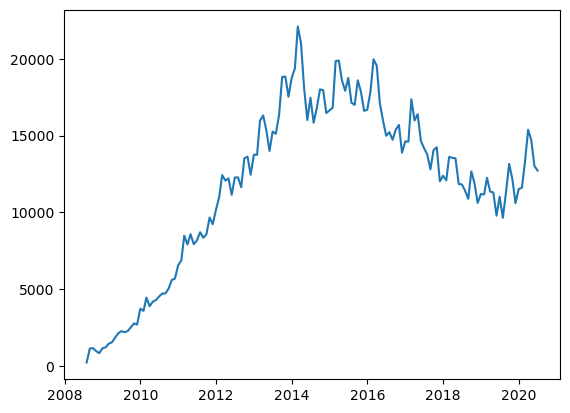

In [25]:
plt.plot(pivoted_df.index, pivoted_df['java'])


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

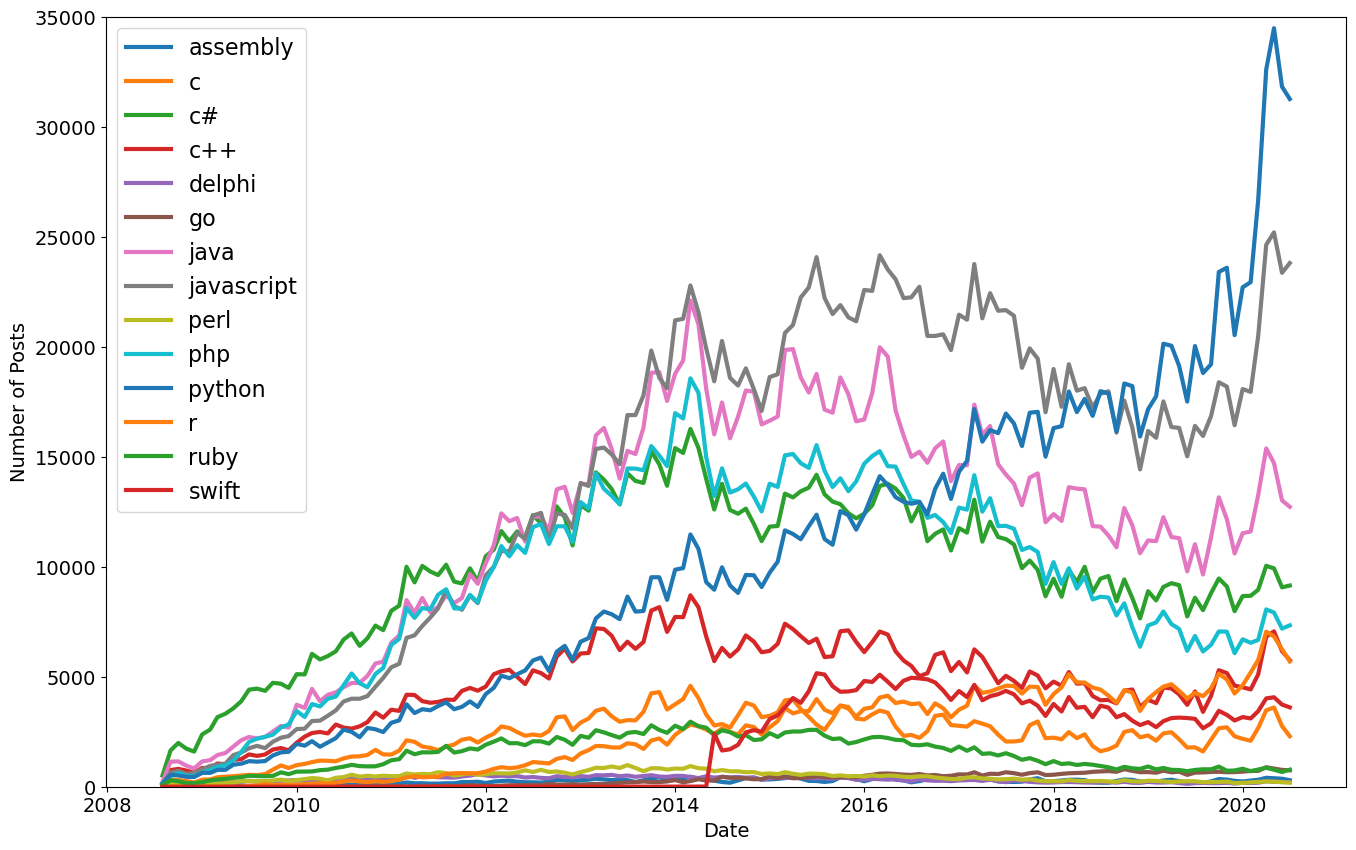

In [31]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in pivoted_df.columns:
    plt.plot(pivoted_df.index, pivoted_df[column], linewidth=3, label=pivoted_df[column].name)

plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

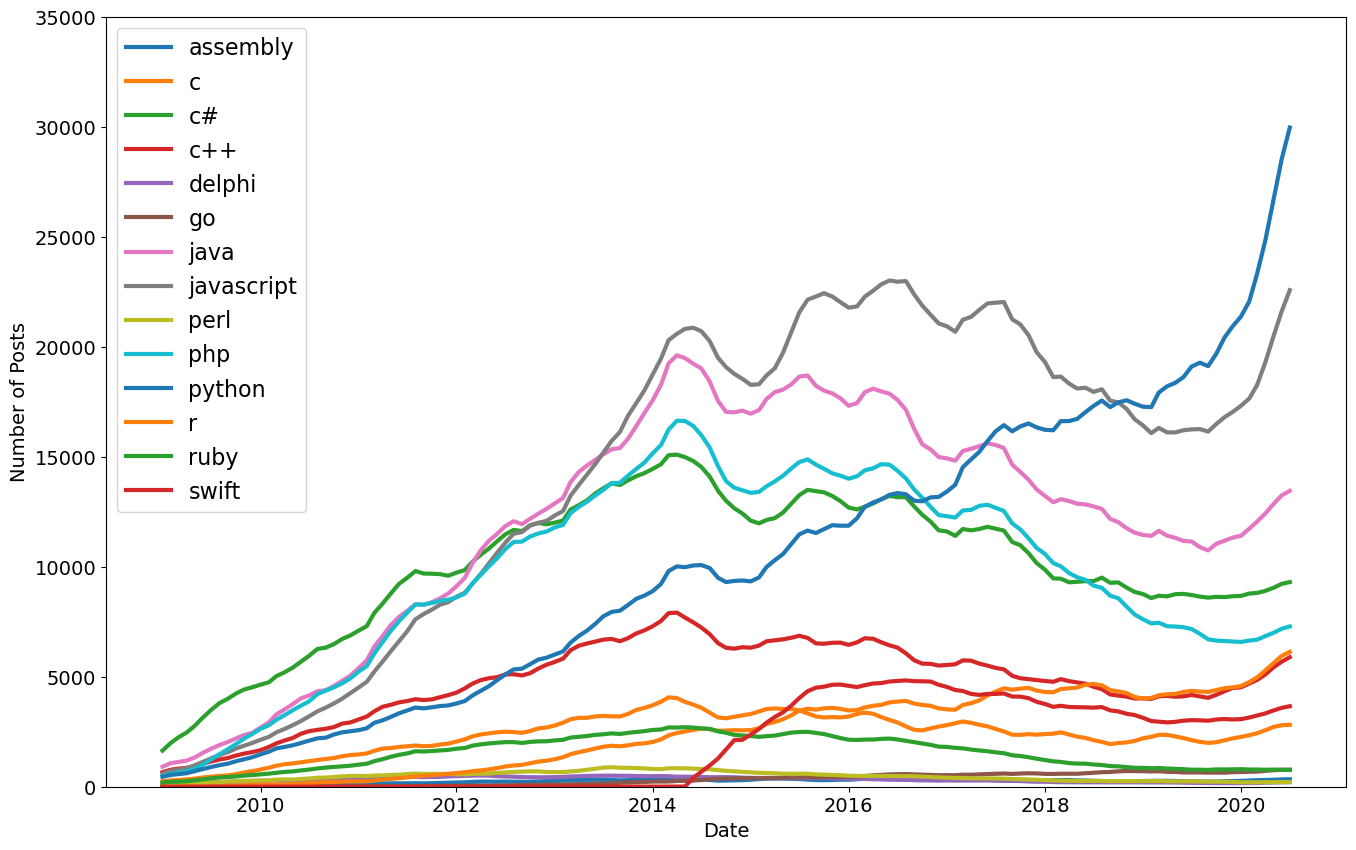

In [32]:
rolled_df = pivoted_df.rolling(window=6).mean()

plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
for column in rolled_df.columns:
    plt.plot(rolled_df.index, rolled_df[column], linewidth=3, label=rolled_df[column].name)

plt.legend(fontsize=16) 